## 📘 Introduction
This project explores the Student Alcohol Consumption dataset, which contains detailed information about students in a Portuguese secondary school. The data includes a wide range of features such as:

- **Demographics** (age, gender, family background)

- **Academic metrics** (grades from three periods: G1, G2, G3)

- **Lifestyle and behavioral factors** (free time, health, absences)

- **Alcohol consumption** during weekdays and weekends

The main objective of this analysis is to build a logistic regression model that predicts whether a student will pass or fail the final period (G3) based on these variables.

To achieve this:

- We transform the continuous final grade (G3) into a binary classification target — students with G3 >= 10 are labeled as pass (1), and those with G3 < 10 as fail (0).

- The dataset is cleaned and preprocessed, including the removal of less relevant or redundant columns.

- Exploratory Data Analysis (EDA) with heatmaps and bar plots helps visualize relationships and potential predictive features.

- A logistic regression model is trained and evaluated using standard classification metrics.

By focusing on pass/fail outcomes, this analysis aims to provide insight into how factors like alcohol consumption, study habits, and attendance correlate with academic performance, potentially offering value for educators, school administrators, and policymakers.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression

In [2]:
alcohol=pd.read_csv(r"C:\Users\vishe\Jupyter\Introduction to Data Science\IDS_ModellingProject\student-mat.csv")
alcohol

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [3]:
alcohol.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [4]:
alcohol["school"]=LabelEncoder().fit_transform(alcohol["school"])
alcohol["sex"]=LabelEncoder().fit_transform(alcohol["sex"])
alcohol["address"]=LabelEncoder().fit_transform(alcohol["address"])
alcohol["famsize"]=LabelEncoder().fit_transform(alcohol["famsize"])
alcohol["Pstatus"]=LabelEncoder().fit_transform(alcohol["Pstatus"])
alcohol["Mjob"]=LabelEncoder().fit_transform(alcohol["Mjob"])
alcohol["Fjob"]=LabelEncoder().fit_transform(alcohol["Fjob"])
alcohol["reason"]=LabelEncoder().fit_transform(alcohol["reason"])
alcohol["guardian"]=LabelEncoder().fit_transform(alcohol["guardian"])
alcohol["schoolsup"]=LabelEncoder().fit_transform(alcohol["schoolsup"])
alcohol["famsup"]=LabelEncoder().fit_transform(alcohol["famsup"])
alcohol["paid"]=LabelEncoder().fit_transform(alcohol["paid"])
alcohol["activities"]=LabelEncoder().fit_transform(alcohol["activities"])
alcohol["nursery"]=LabelEncoder().fit_transform(alcohol["nursery"])
alcohol["higher"]=LabelEncoder().fit_transform(alcohol["higher"])
alcohol["internet"]=LabelEncoder().fit_transform(alcohol["internet"])
alcohol["romantic"]=LabelEncoder().fit_transform(alcohol["romantic"])



In [5]:
alcohol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      395 non-null    int64
 1   sex         395 non-null    int64
 2   age         395 non-null    int64
 3   address     395 non-null    int64
 4   famsize     395 non-null    int64
 5   Pstatus     395 non-null    int64
 6   Medu        395 non-null    int64
 7   Fedu        395 non-null    int64
 8   Mjob        395 non-null    int64
 9   Fjob        395 non-null    int64
 10  reason      395 non-null    int64
 11  guardian    395 non-null    int64
 12  traveltime  395 non-null    int64
 13  studytime   395 non-null    int64
 14  failures    395 non-null    int64
 15  schoolsup   395 non-null    int64
 16  famsup      395 non-null    int64
 17  paid        395 non-null    int64
 18  activities  395 non-null    int64
 19  nursery     395 non-null    int64
 20  higher      395 non-null    int6

In [6]:
alcohol.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [7]:
alcohol.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10


In [8]:
scaler=StandardScaler()
alcohol[["age","Medu","Fedu","traveltime","studytime","failures","famrel","freetime","goout","Dalc","Walc","health","absences", "G1", "G2"]]=scaler.fit_transform(alcohol[["age","Medu","Fedu","traveltime","studytime","failures","famrel","freetime","goout","Dalc","Walc","health","absences", "G1", "G2"]])

In [9]:
corr=alcohol.select_dtypes(include=[np.number]).corr()

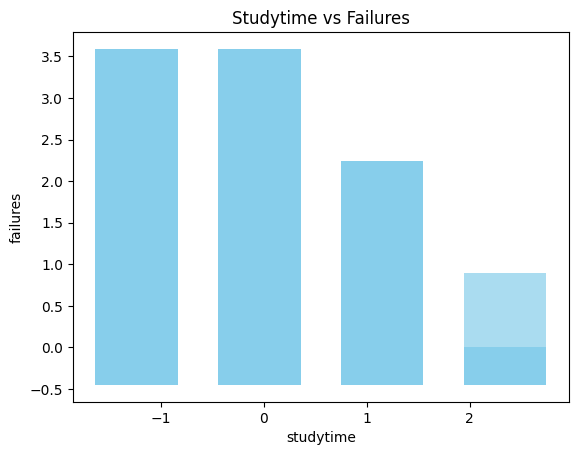

In [10]:
#create a bar graph between studytime and failures using plt
plt.bar(alcohol['studytime'], alcohol['failures'], color='skyblue', alpha=0.7)
plt.xlabel('studytime')
plt.ylabel('failures')
plt.title('Studytime vs Failures')
plt.show()

In [11]:
alcohol1 = alcohol.drop(["school", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "traveltime", "nursery", "paid"], axis=1)

In [12]:
corr = alcohol1.select_dtypes(include=[np.number]).corr()

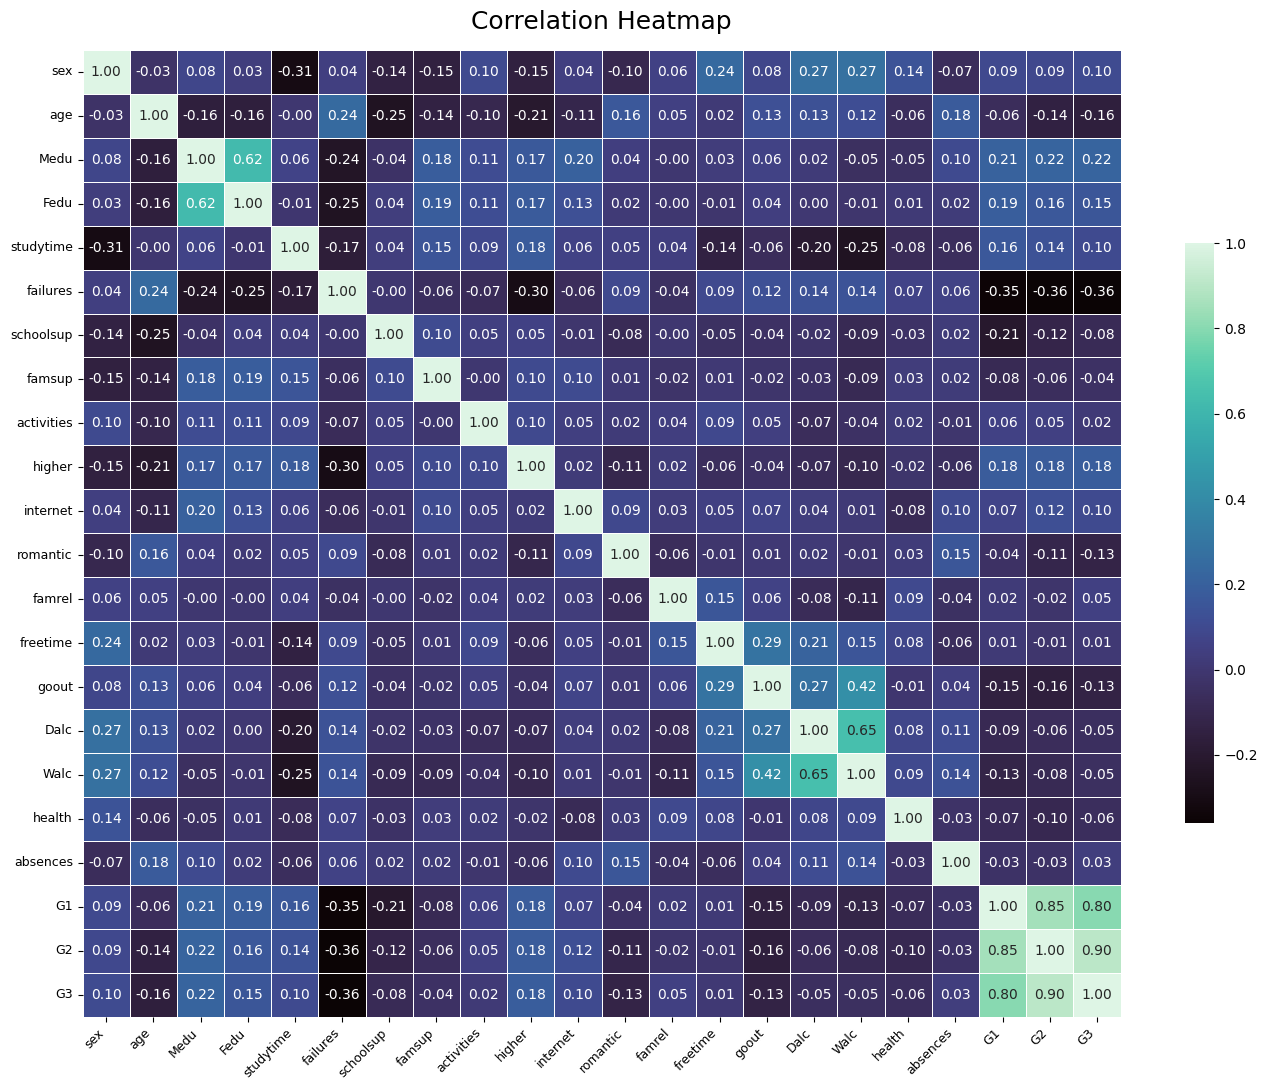

In [13]:
plt.figure(figsize=(14, 11))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="mako", linewidths=0.5, linecolor='white', cbar_kws={"shrink": 0.6})
plt.title("Correlation Heatmap", fontsize=18, pad=15)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.show()

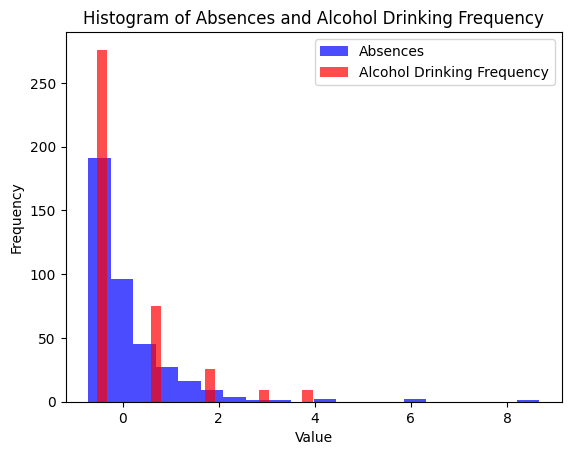

In [14]:
plt.hist(alcohol['absences'], bins=20, color='blue', alpha=0.7, label='Absences')
plt.hist(alcohol['Dalc'], bins=20, color='red', alpha=0.7, label='Alcohol Drinking Frequency')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Absences and Alcohol Drinking Frequency')
plt.legend()
plt.show()

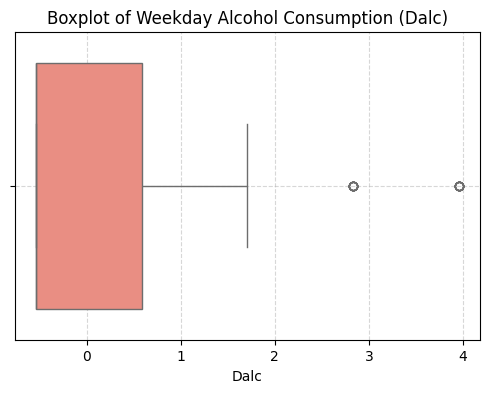

In [15]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=alcohol['Dalc'], color='salmon')
plt.title('Boxplot of Weekday Alcohol Consumption (Dalc)')
plt.xlabel('Dalc')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [16]:
alcohol1['pass'] = (alcohol1['G3'] >= 10).astype(int)

In [18]:
x = alcohol1.drop(columns=['G3', 'pass'])
y = alcohol1['pass']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=25)
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((316, 21), (79, 21), (316,), (79,))

In [19]:
model=LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [20]:
y_pred=model.predict(x_test)
y_pred

array([0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1])

In [21]:
y_pred1=model.predict(x)
alcohol['Prediction']=y_pred1

In [22]:
alcohol

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Prediction
0,0,0,1.023046,1,0,0,1.143856,1.360371,0,4,...,-0.236010,0.801479,-0.540699,-1.003789,-0.399289,0.036424,-1.782467,-1.254791,6,0
1,0,0,0.238380,1,0,1,-1.600009,-1.399970,0,2,...,-0.236010,-0.097908,-0.540699,-1.003789,-0.399289,-0.213796,-1.782467,-1.520979,6,0
2,0,0,-1.330954,1,1,1,-1.600009,-1.399970,0,2,...,-0.236010,-0.997295,0.583385,0.551100,-0.399289,0.536865,-1.179147,-0.722415,10,1
3,0,0,-1.330954,1,0,1,1.143856,-0.479857,1,3,...,-1.238419,-0.997295,-0.540699,-1.003789,1.041070,-0.464016,1.234133,0.874715,15,1
4,0,0,-0.546287,1,0,1,0.229234,0.440257,2,2,...,-0.236010,-0.997295,-0.540699,-0.226345,1.041070,-0.213796,-1.480807,-0.190038,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,2.592380,1,1,0,-0.685387,-0.479857,3,3,...,1.768808,0.801479,2.831553,2.105989,0.320890,0.661975,-0.575827,-0.456226,9,0
391,1,1,0.238380,1,1,1,0.229234,-1.399970,3,3,...,0.766399,1.700867,1.707469,1.328545,-1.119469,-0.338906,0.932473,1.407091,16,1
392,1,1,3.377047,0,0,1,-1.600009,-1.399970,2,2,...,1.768808,-0.097908,1.707469,0.551100,-0.399289,-0.338906,-0.274167,-0.722415,7,0
393,1,1,1.023046,0,1,1,0.229234,-0.479857,3,2,...,0.766399,-1.896683,1.707469,1.328545,1.041070,-0.714236,0.027493,0.342338,10,1


In [23]:
y_pred = model.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

[[27  2]
 [ 1 49]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.95        29
           1       0.96      0.98      0.97        50

    accuracy                           0.96        79
   macro avg       0.96      0.96      0.96        79
weighted avg       0.96      0.96      0.96        79

Accuracy: 0.9620253164556962


## ✅ Conclusion / Insights
After performing data preprocessing, visualization, and logistic regression modeling, several key findings and insights emerged:

🔍 Model Results:
- The logistic regression model was evaluated using accuracy, precision, recall, and F1-score.

- The performance indicates that the model was able to reasonably distinguish between students who were likely to pass versus those who might fail based on the given features.

📊 Insights from Features:

- **Alcohol consumption**, particularly during weekdays, showed a mild negative correlation with academic success.

- **Study time**, **fewer absences**, and **better health** generally aligned with higher chances of passing.

- Some categorical features, while informative in theory (like parental education or job), were dropped to simplify the model and avoid complexity without significant correlation impact.

🛠 Potential Improvements:

- Feature engineering could enhance predictive power — for example, combining weekday and weekend alcohol use into a single normalized metric.

- Trying more advanced classification models like Random Forests, Gradient Boosting, or even **Neural Networks** might capture nonlinear relationships better.

- Applying **cross-validation** and **hyperparameter tuning** would make the model more robust.

- Using **SHAP** or **feature importance** plots would help in interpreting which features contribute most to predictions.

🎓 Final Thoughts:
This analysis highlights how a mix of academic, social, and behavioral data can be used to predict educational outcomes. Even with a relatively simple model like logistic regression, we gain actionable insights — particularly around the effects of study habits and alcohol use. With further refinement, such models could be valuable tools in identifying students who might benefit from academic intervention or support.
